# Select Data

In [1]:
import pandas as pd
import requests
from IPython.display import Image
import time
from ftplib import FTP

In [2]:
typdict = {'NDC':'str'}
pills = pd.read_csv('../Data/directory_of_images.txt',sep='|', dtype=typdict, names=['NDC','IDK','FILE','TYPE','DRUG'])
pills = pills.dropna()
pills.DRUG = pills.DRUG.str.upper()
pills

,NDC,IDK,FILE,TYPE,DRUG
0,00002322730,1,PillProjectDisc69/images/CLLLLUPGIX7J8MP1WWQ9W...,C3PI_Reference,STRATTERA 10MG
1,00002322730,1,PillProjectDisc98/images/PRNJ-AXZIQ!HUQKJJBP_D...,C3PI_Reference,STRATTERA 10MG
2,00002322730,1,PillProjectDisc10/images/79U-YY6M1UUR6F127ZMAC...,C3PI_Test,STRATTERA 10MG
3,00002322730,1,PillProjectDisc11/images/7WVFV5H74!ELFNQ_GUH92...,C3PI_Test,STRATTERA 10MG
4,00002322730,1,PillProjectDisc20/images/B4CH0R9B7PEQ6GORRX-8X...,C3PI_Test,STRATTERA 10MG
...,...,...,...,...,...
133769,99207046730,1,PillProjectDisc103/images/TY5OVXLLOXV6H4I1TDVT...,MC_COOKED_CALIBRATED_V1.2,SOLODYN 105 MG TAB
133770,99207046730,1,PillProjectDisc31/images/BEIR3XK38EMGSDOZTWMUK...,MC_COOKED_CALIBRATED_V1.2,SOLODYN 105 MG TAB
133771,99207046730,1,PillProjectDisc69/images/CLJ1W40OS0XG5H6IVYT!N...,MC_COOKED_CALIBRATED_V1.2,SOLODYN 105 MG TAB
133772,99207046730,1,PillProjectDisc77/images/CSUHWDZ!XAZSEJHDANMFR...,MC_COOKED_CALIBRATED_V1.2,SOLODYN 105 MG TAB


In [43]:
pills[pills.NDC.str.startswith('52152')].NDC.value_counts()

52152034102    33
Name: NDC, dtype: int64

In [42]:
pills[pills.DRUG.str.startswith('OXYC')].NDC.value_counts()

00093573401    17
00555065802    17
00093573101    17
00093573201    17
00093573301    17
Name: NDC, dtype: int64

In [27]:
pills.TYPE.value_counts()

C3PI_Test                     43544
MC_C3PI_REFERENCE_SEG_V1.6    41330
MC_COOKED_CALIBRATED_V1.2     20034
C3PI_Reference                10334
MC_SPL_SPLIMAGE_V3.0           4708
MC_API_NLMIMAGE_V1.3           4708
MC_API_RXNAV_V1.3              4708
MC_CHALLENGE_V1.0              4408
Name: TYPE, dtype: int64

In [28]:
pills.IDK.value_counts()

1    130823
2      2034
3       555
4       343
5        19
Name: IDK, dtype: int64

In [13]:
pills.DRUG.value_counts()

LEVOTHYROXINE SODIUM            776
LISINOPRIL TABLETS USP          494
SIMVASTATIN                     444
WARFARIN SODIUM                 434
WARFARIN SODIUM TABLETS, USP    434
                               ... 
LAMICTAL 150MG TAB               12
LAMICTAL 200MG TAB               12
LAMICTAL 100MG TAB               12
INNOPRAN XL 120MG CAP            12
LOVAZA CAP 1GM                   12
Name: DRUG, Length: 2840, dtype: int64

In [15]:
pills.DRUG.nunique()

2840

In [16]:
pills.NDC.nunique()

4864

In [3]:
top10 = pills.NDC.value_counts()[:10]
len(top10),top10

(10,
 00555903270    142
 00555901258    142
 63459070160    136
 52544029128    136
 00039022310    117
 00555903458    116
 50419040901    113
 51285011458    111
 00007365022    103
 00173024255     99
 Name: NDC, dtype: int64)

In [4]:
top10NDC = top10.index.tolist()

In [5]:
df = pills[pills.NDC.isin(top10NDC)]
df.DRUG.value_counts()

TRI-LEGEST FE              142
NORTEL 7/7/7               142
TRIVORA TAB                136
AMARYL 4MG TABLETS         117
NATAZIA                    113
MIRCETTE                   111
AMRIX CAP 30MG             101
BALZIVA                     66
LANOXIN TABLETS, USP        55
DYAZIDE CAPS                52
DYAZIDE                     51
BALZIVA TAB                 50
LANOXIN 0.125MG TABLETS     44
AMRIX                       35
Name: DRUG, dtype: int64

In [7]:
df.DRUG[df.NDC == top10NDC[2]] = 'AMRIX 30MG'

df.DRUG[df.NDC == top10NDC[5]] = 'BALZIVA'

df.DRUG[df.NDC == top10NDC[8]] = 'DYAZIDE'

df.DRUG[df.NDC == top10NDC[9]] = 'COMBIVIR 150/300'

/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

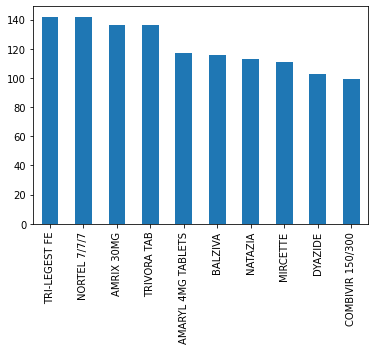

In [18]:
df.DRUG.value_counts().plot(kind='bar')

In [9]:
drugs = df.DRUG.value_counts().index.tolist()
drugs

['TRI-LEGEST FE',
 'NORTEL 7/7/7',
 'AMRIX 30MG',
 'TRIVORA TAB',
 'AMARYL 4MG TABLETS',
 'BALZIVA',
 'NATAZIA',
 'MIRCETTE',
 'DYAZIDE',
 'COMBIVIR 150/300']

In [10]:
df

,NDC,IDK,FILE,TYPE,DRUG
1783,00007365022,1,PillProjectDisc40/images/BNCP-9IQ3I-B1AK05KJGY...,C3PI_Reference,DYAZIDE
1784,00007365022,1,PillProjectDisc70/images/CMY2RZHAK0IQFKI-EJ91T...,C3PI_Reference,DYAZIDE
1785,00007365022,1,PillProjectDisc77/images/CSZ5USH95QL78TU2L!U55...,C3PI_Reference,DYAZIDE
1786,00007365022,1,PillProjectDisc91/images/IXBCZI_!IQP!E9MWTSA2Y...,C3PI_Reference,DYAZIDE
1787,00007365022,1,PillProjectDisc103/images/TPEMYB_VH6IQ_M_J7D0!...,C3PI_Test,DYAZIDE
...,...,...,...,...,...
118419,63459070160,1,PillProjectDisc49/images/BVSJUMXA_2YYIA9FWAZP2...,MC_COOKED_CALIBRATED_V1.2,AMRIX 30MG
118420,63459070160,1,PillProjectDisc57/images/CA4VW8H6_G6B36O_99TJW...,MC_COOKED_CALIBRATED_V1.2,AMRIX 30MG
118421,63459070160,1,PillProjectDisc90/images/I8IP8T6CW_VUGZZYPH30_...,MC_COOKED_CALIBRATED_V1.2,AMRIX 30MG
118422,63459070160,1,PillProjectDisc97/images/ODUQGLEEXJEAR-FL18J81...,MC_COOKED_CALIBRATED_V1.2,AMRIX 30MG


In [11]:
drugsftp = df.FILE.tolist()
drugsftp.sort()
drugsftp[:10]

['PillProjectDisc1/images/!N0GWPVK!D6RZMO!28U2G_GBCT8YP2.JPG',
 'PillProjectDisc1/images/!P31ERRM_M7RRSPBWHL80GEAAAA6WF.JPG',
 'PillProjectDisc1/images/!XXJR-NQ-A-4POK3ZKW1CTLALT2N83.PNG',
 'PillProjectDisc1/images/!_1RYL_F1RDMPO3SRTSBK2L-G2C!KN.PNG',
 'PillProjectDisc10/images/6S1EGUCUJUCS5Y2G_PVBETH0A9X22L.JPG',
 'PillProjectDisc10/images/6_6!XJ73P9O12E6LVGBAIIGMNO252A.JPG',
 'PillProjectDisc10/images/6_6!XJ73P9O12E6LVGBAIIGMNO252A.JPG',
 'PillProjectDisc10/images/7!U5OIAL6W!52!L488NFS4OZ9B86QM.CR2',
 'PillProjectDisc10/images/7-UZK9UIGDQAHEGLPZ5!HYONW5F16L.JPG',
 'PillProjectDisc10/images/726N6FO55R1JXV6JSTW0Z-CWY6OBB-.JPG']

# Retrieve Data

## FTP

In [ ]:
%cd ../Data/images

%pwd

In [ ]:
ftpdir = {}
for i in range(0,len(drugsftp)):
    ftpcall = drugsftp[i].split('/')
    ftppath = ftpcall[0]+'/'+ftpcall[1]+ '/'
    ftpfile = ftpcall[-1]
    ftpdir.setdefault(ftppath,[])
    ftpdir[ftppath].append(ftpfile)

In [ ]:
for key in ftpdir.keys():
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')
    ftp.cwd(key)
    for value in ftpdir[key]:
        with open(value, 'wb') as fp:
            ftp.retrbinary('RETR '+ value, fp.write)

## Other option

In [ ]:
links = []
for x in drugsftp:
    links.append(path+x)

In [ ]:
len(links),links[:5]

In [12]:
path = 'ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Pills//'

# Sort by Class (Drug)

# Prep Images

## Augmentation